In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
round(df.describe())

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.0,32561.0,32561.0,32561.0,32561.0,32561.0
mean,39.0,189778.0,10.0,1078.0,87.0,40.0
std,14.0,105550.0,3.0,7385.0,403.0,12.0
min,17.0,12285.0,1.0,0.0,0.0,1.0
25%,28.0,117827.0,9.0,0.0,0.0,40.0
50%,37.0,178356.0,10.0,0.0,0.0,40.0
75%,48.0,237051.0,12.0,0.0,0.0,45.0
max,90.0,1484705.0,16.0,99999.0,4356.0,99.0


# Checking Null Value

In [7]:
round(df.isnull().sum()/df.shape[0]*100,2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

In [8]:
round(df['income'].value_counts()/df.shape[0]*100,2).astype('str')+ '%'

<=50K    75.92%
>50K     24.08%
Name: income, dtype: object

# * Exploratory Data Analysis

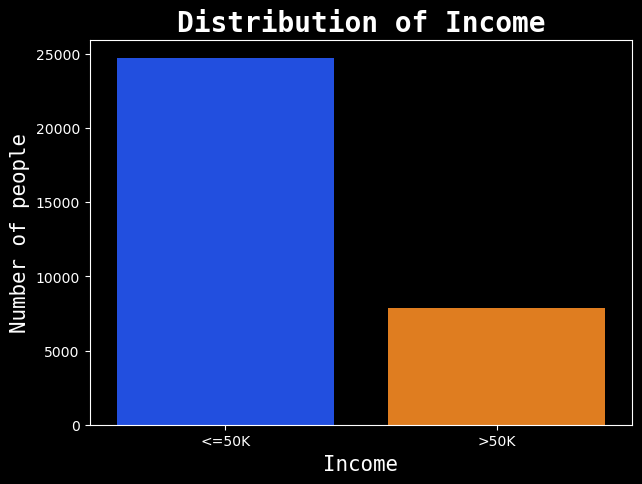

In [9]:
income=df['income'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

# 1 )  Age Impact On Income.

Text(0.5, 1.0, 'Distribution of Income Wrt Age')

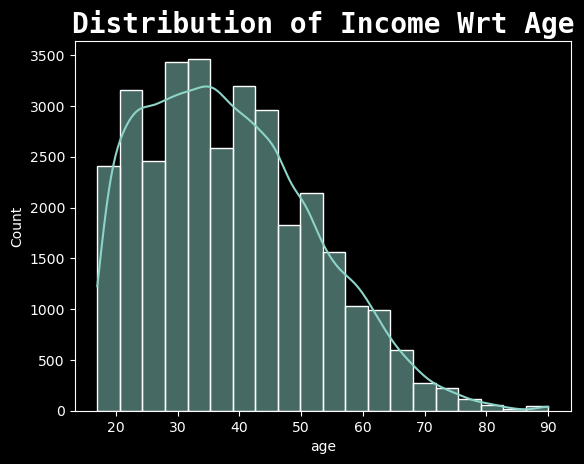

In [10]:
sns.histplot(df,x='age',kde=True,bins=20)
plt.title('Distribution of Income Wrt Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})

# 1. 1 )  Distribution Of Income Across Age.

In [11]:
df.sample()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4066,33,Local-gov,365908,HS-grad,9,Married-civ-spouse,Other-service,Husband,Black,Male,2105,0,40,United-States,<=50K


In [12]:
bins = [0,10, 20,30, 40,50,60,70,80,100]
labels = ['0-10', '10-20', '20-30', '30-40','40-50','50-60','70-80','80-90','90+']

# create a new column with age ranges
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels)


In [13]:
df.sample()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_range
12259,26,Private,262656,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K,20-30


Text(0.5, 1.0, 'Distribution of Income across Age')

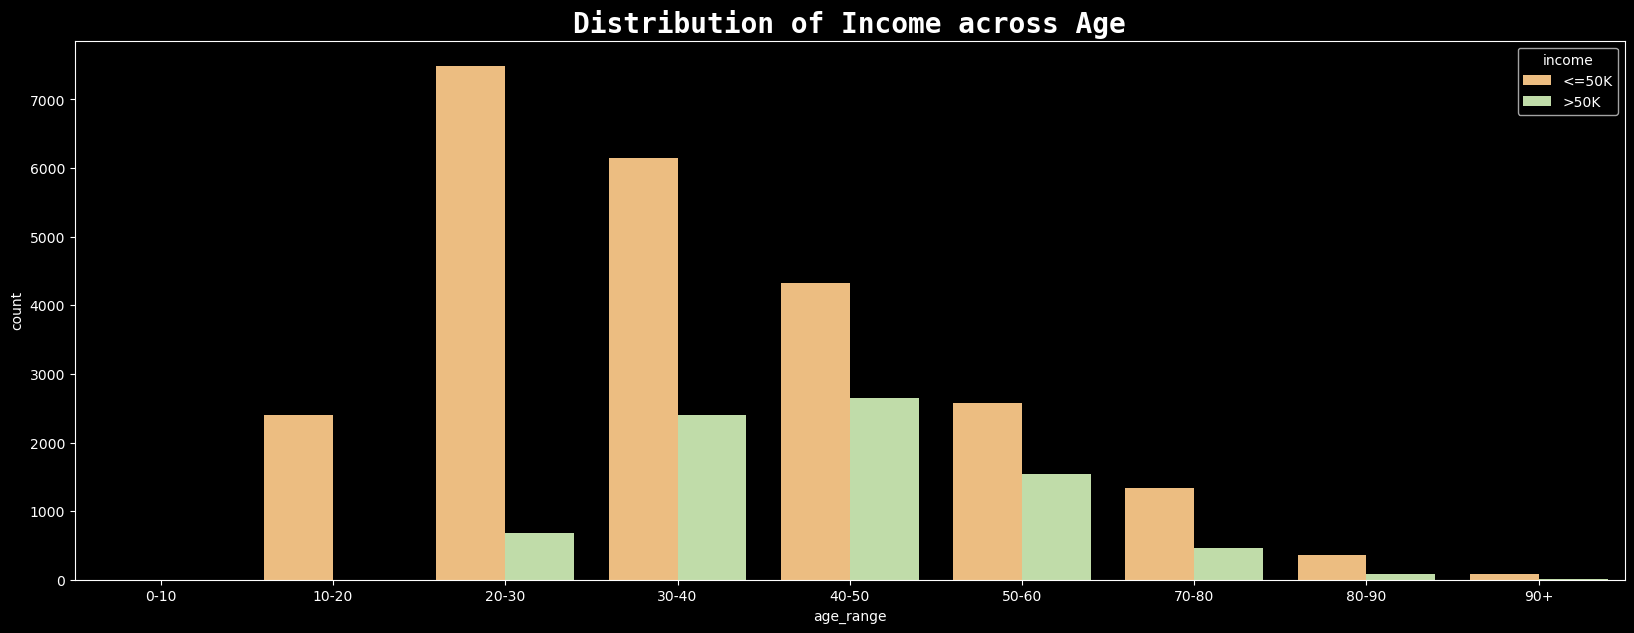

In [14]:
plt.figure(figsize=(20, 7))
sns.countplot(df['age_range'], hue=df['income'],palette="Spectral")
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})

# 2 ) Workclass Impact On Income. 

In [15]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

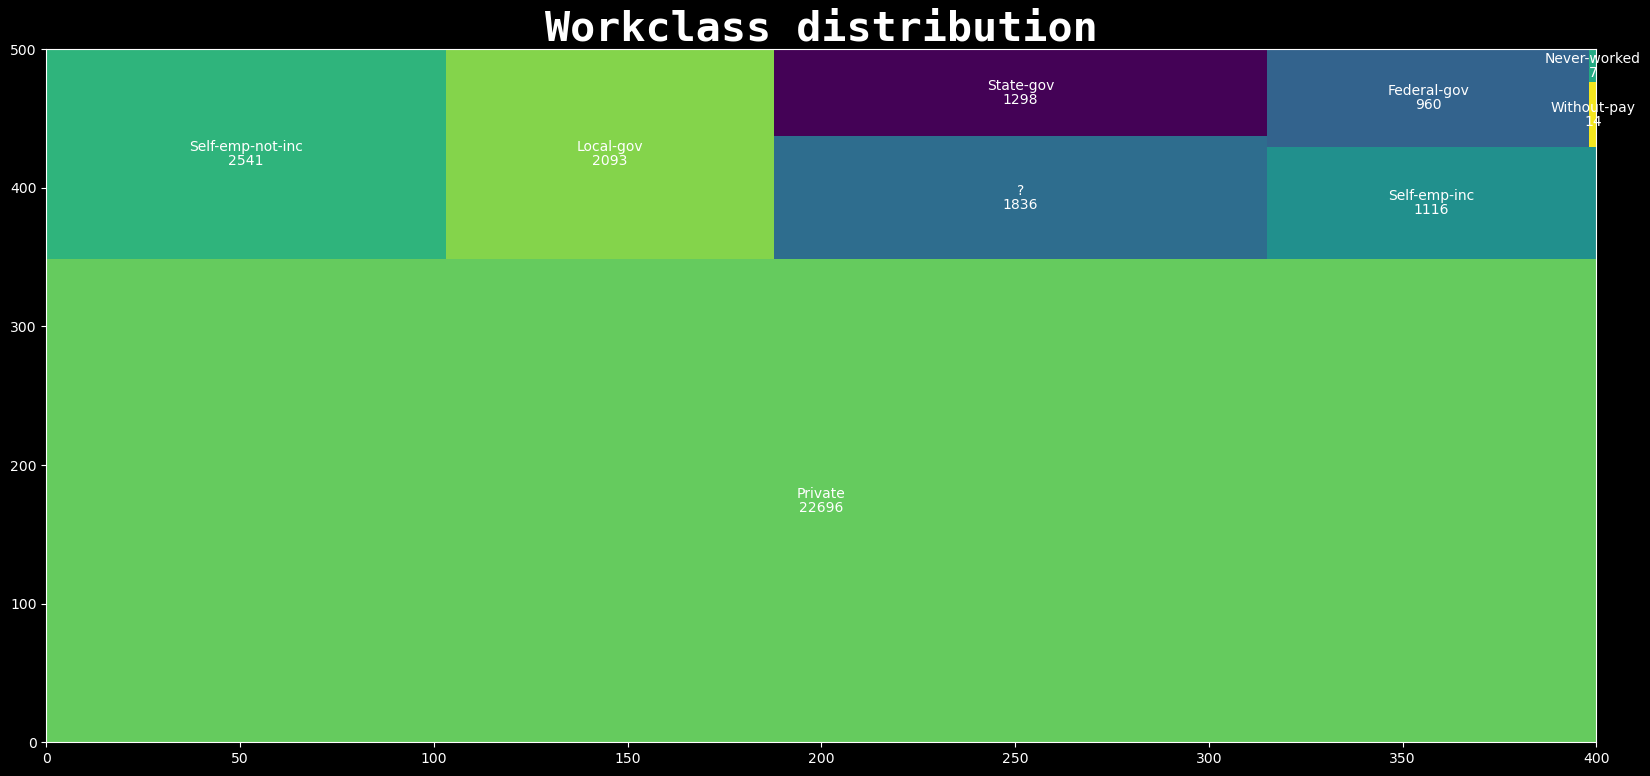

In [16]:
import squarify
race = df['workclass'].value_counts()
plt.figure(figsize=(20, 9))
squarify.plot(sizes=race.values, label=race.index, value=race.values, norm_x=400,norm_y=500)
plt.title('Workclass distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.show()

# 2.1 ) Workclass Wrt Sex.

<AxesSubplot:xlabel='sex,workclass'>

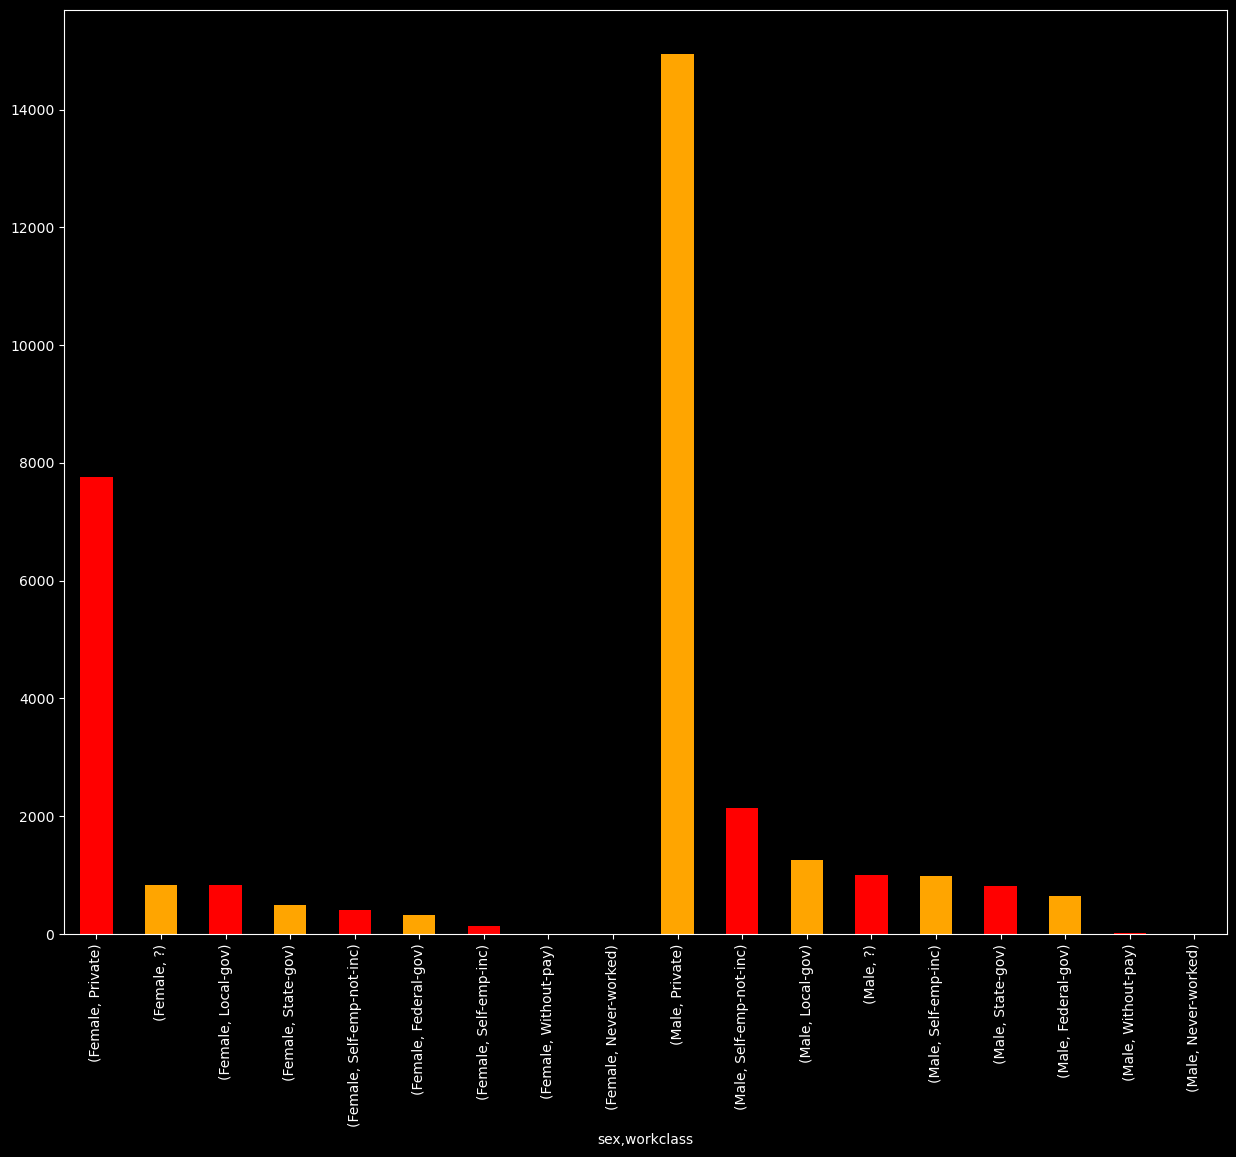

In [17]:
plt.figure(figsize=(15,12))
df.groupby('sex')['workclass'].value_counts().plot(kind='bar',color=['r','orange'])

# 3 ) Effect of fnlwgt on income. 

Text(0.5, 1.0, 'Distribution of final weight')

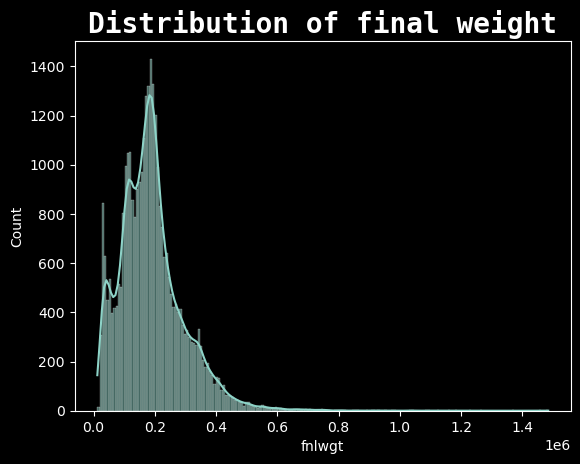

In [18]:
sns.histplot(df['fnlwgt'],kde='True')
plt.title('Distribution of final weight', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})

In [19]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
age_range             8
dtype: int64

# 4 ) Education years Impact On Income.

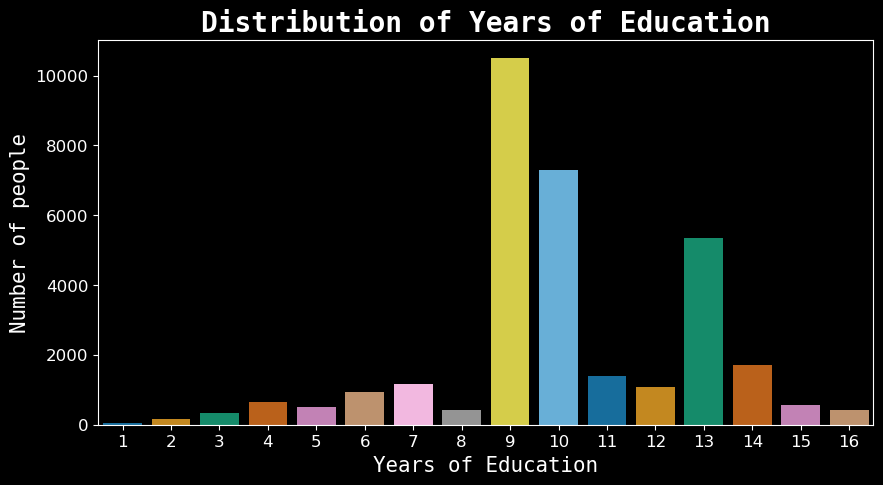

In [20]:
edu_num = df['education.num'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(edu_num.index, edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

# 4.1) Distribution of Income across Years of Education.

In [21]:
df.sample()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_range
7224,55,Private,198385,7th-8th,4,Widowed,Other-service,Unmarried,White,Female,0,0,20,?,<=50K,50-60


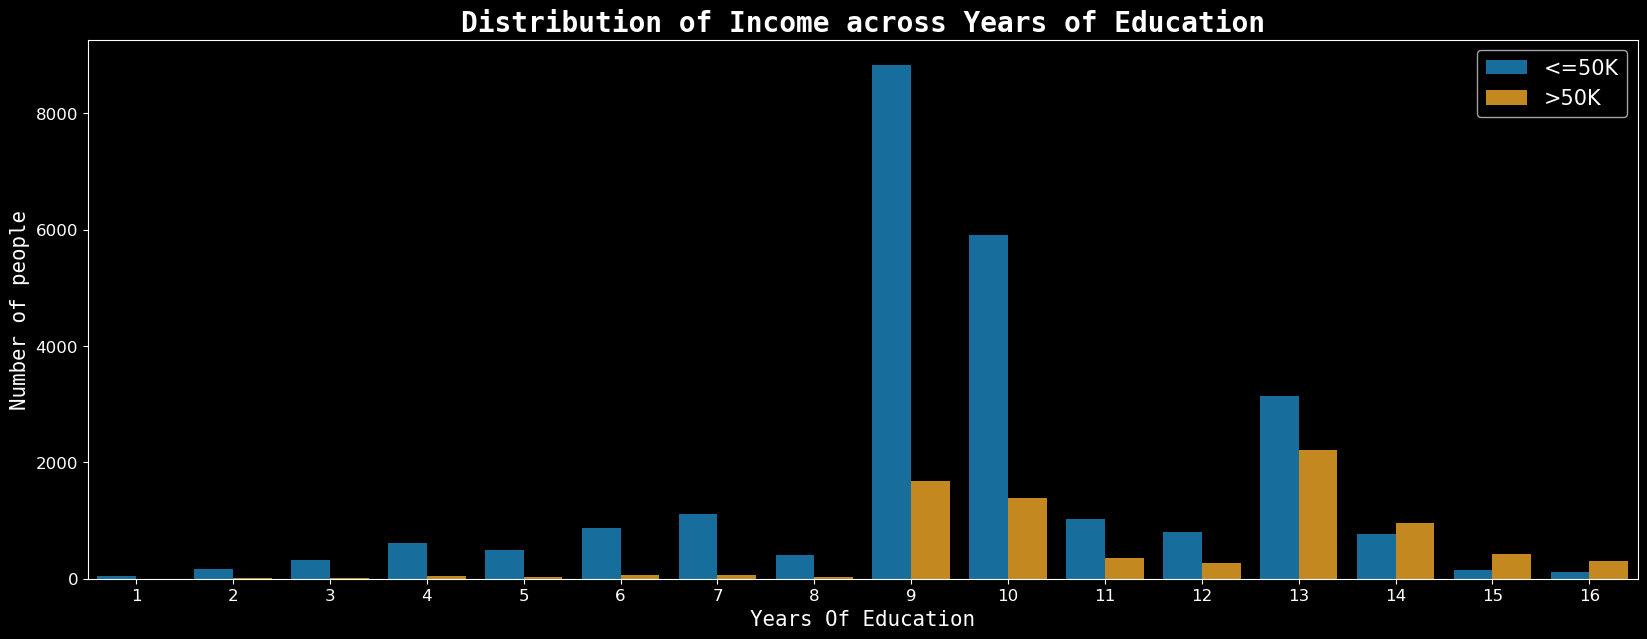

In [22]:
plt.figure(figsize=(20, 7))
sns.countplot(df['education.num'],
              hue=df['income'], palette='colorblind')
plt.title('Distribution of Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years Of Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

# 5 ) Marital Status Impact On Income.

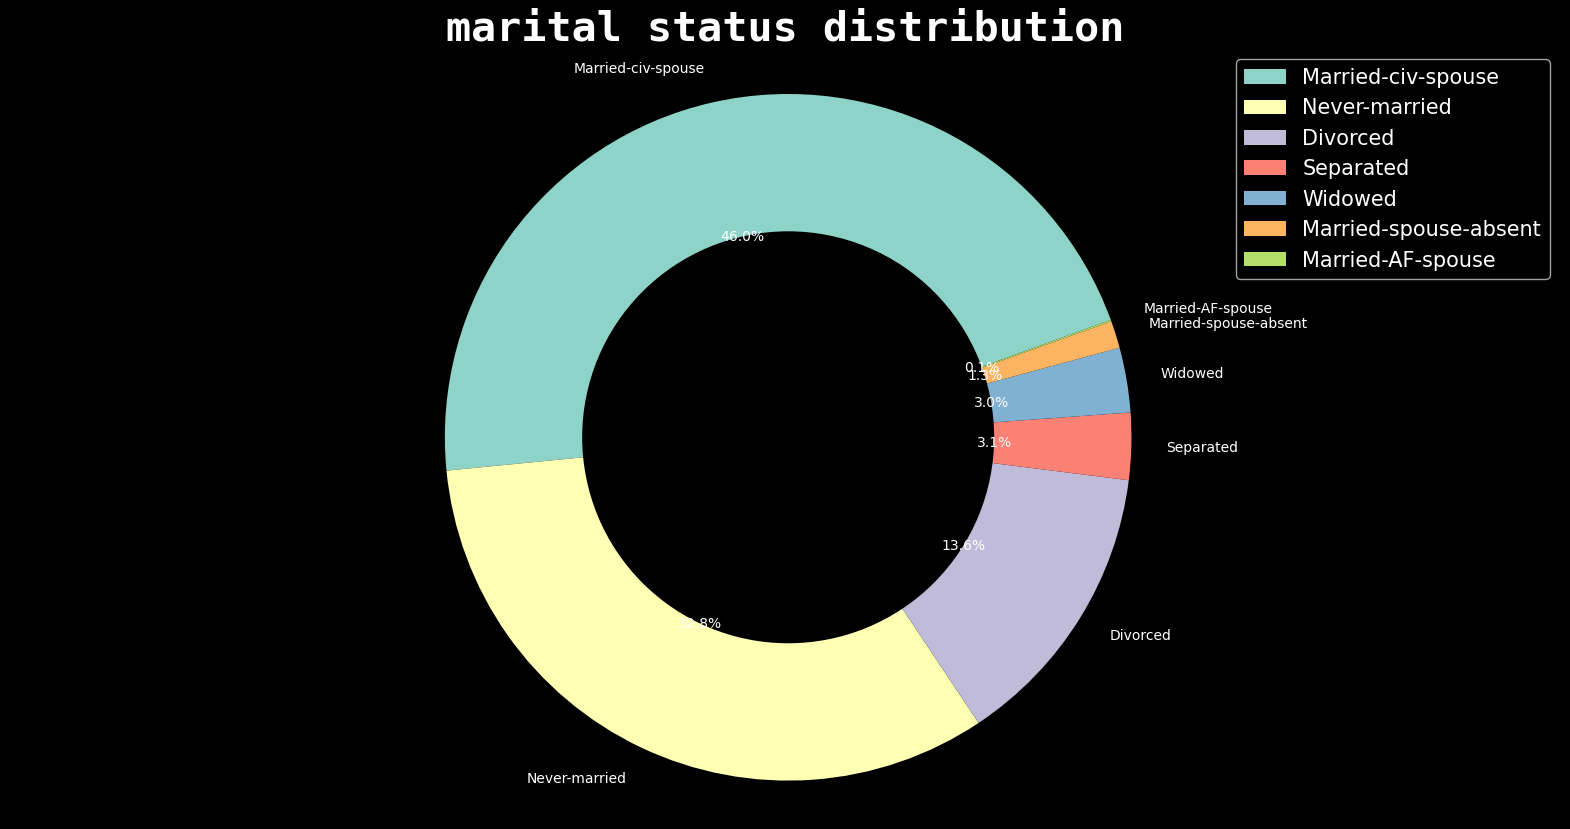

In [23]:
relation = df['marital.status'].value_counts()

plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=20, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.6, fc='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('marital status distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

# 5.1 ) Distribution Of Income Across Marital Status.

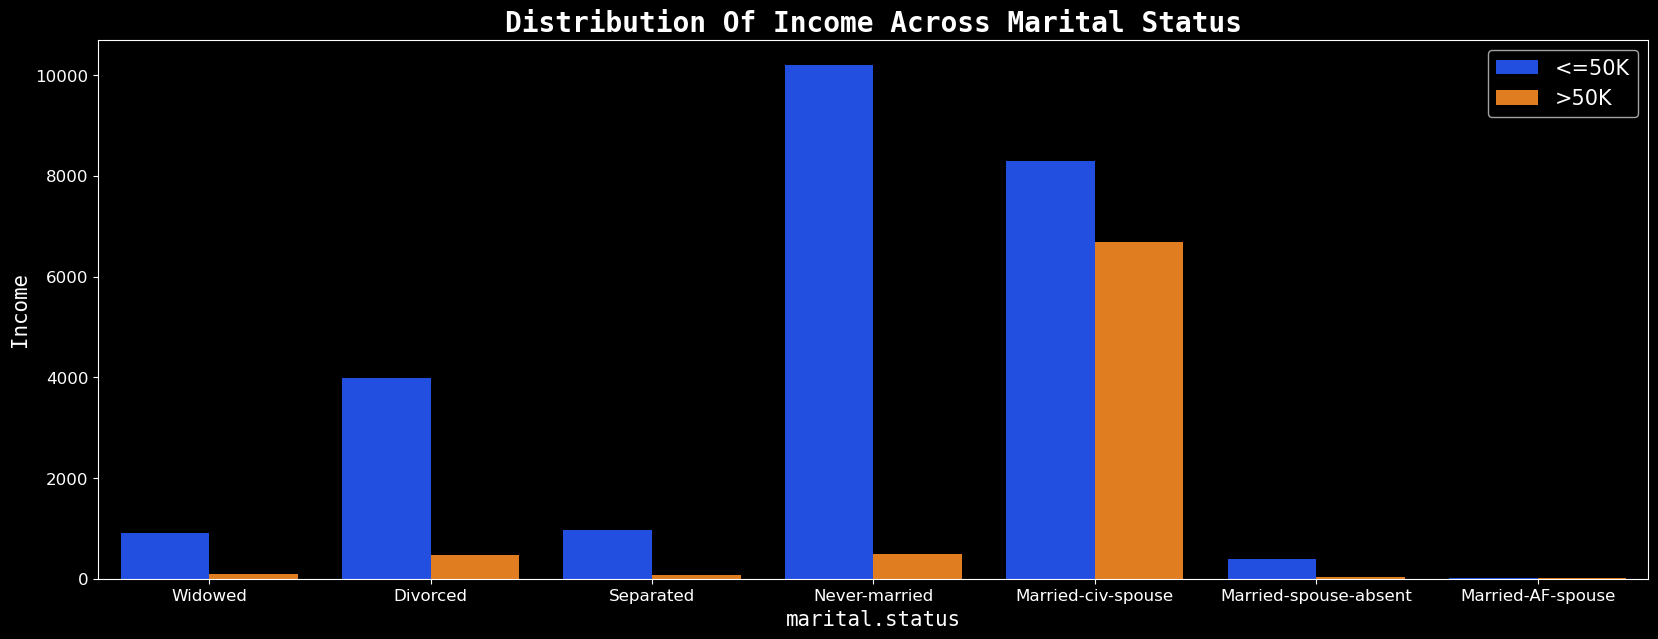

In [24]:
plt.figure(figsize=(20, 7))
sns.countplot(df['marital.status'],
              hue=df['income'], palette='bright')
plt.title('Distribution Of Income Across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('marital.status', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Income', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

# 6 ) Distribution of Education.

In [25]:
df.sample()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_range
14222,27,Private,218184,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,40,Jamaica,<=50K,20-30


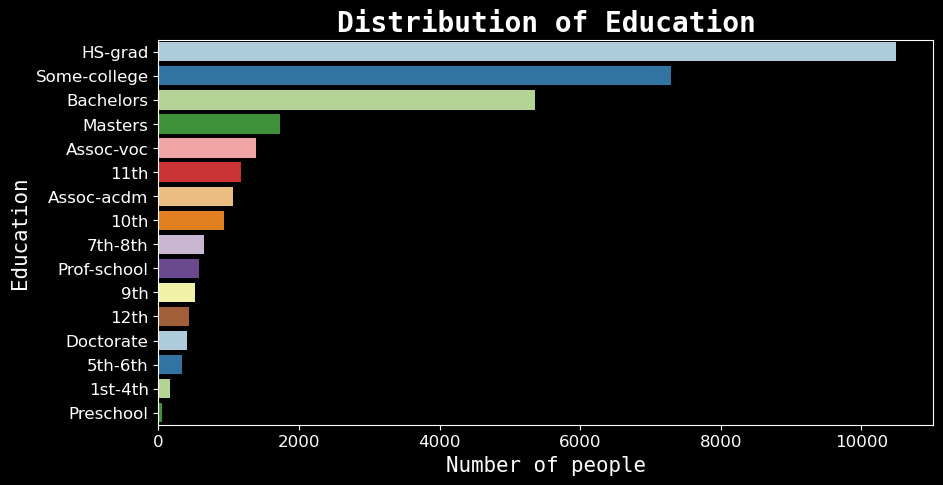

In [26]:
# Creating a barplot for 'Education'
edu = df['education'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

# 6.1 ) Education Impact On Income.

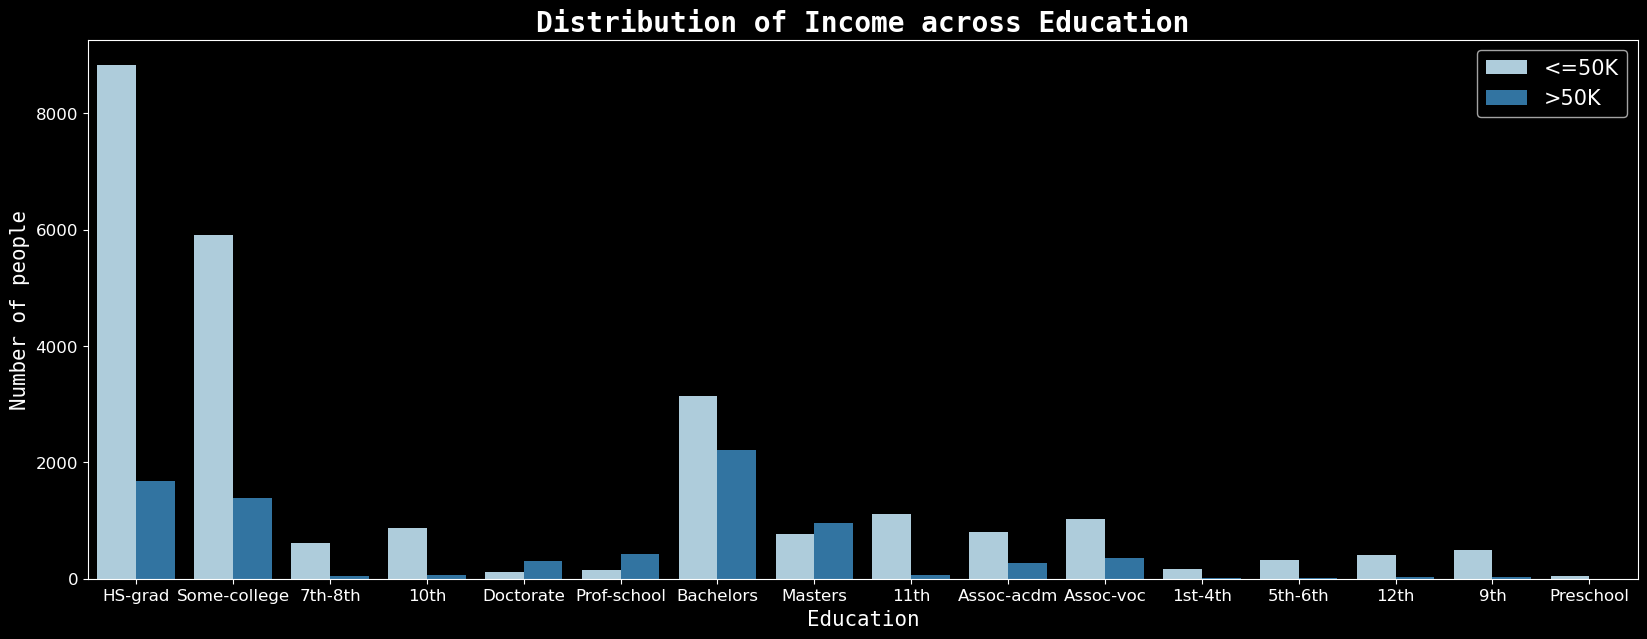

In [27]:
plt.figure(figsize=(20, 7))
sns.countplot(df['education'],
              hue=df['income'], palette='Paired')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()


# 7.2) Impact Of Occupation On Income.

In [28]:
occupation=df['occupation'].value_counts()

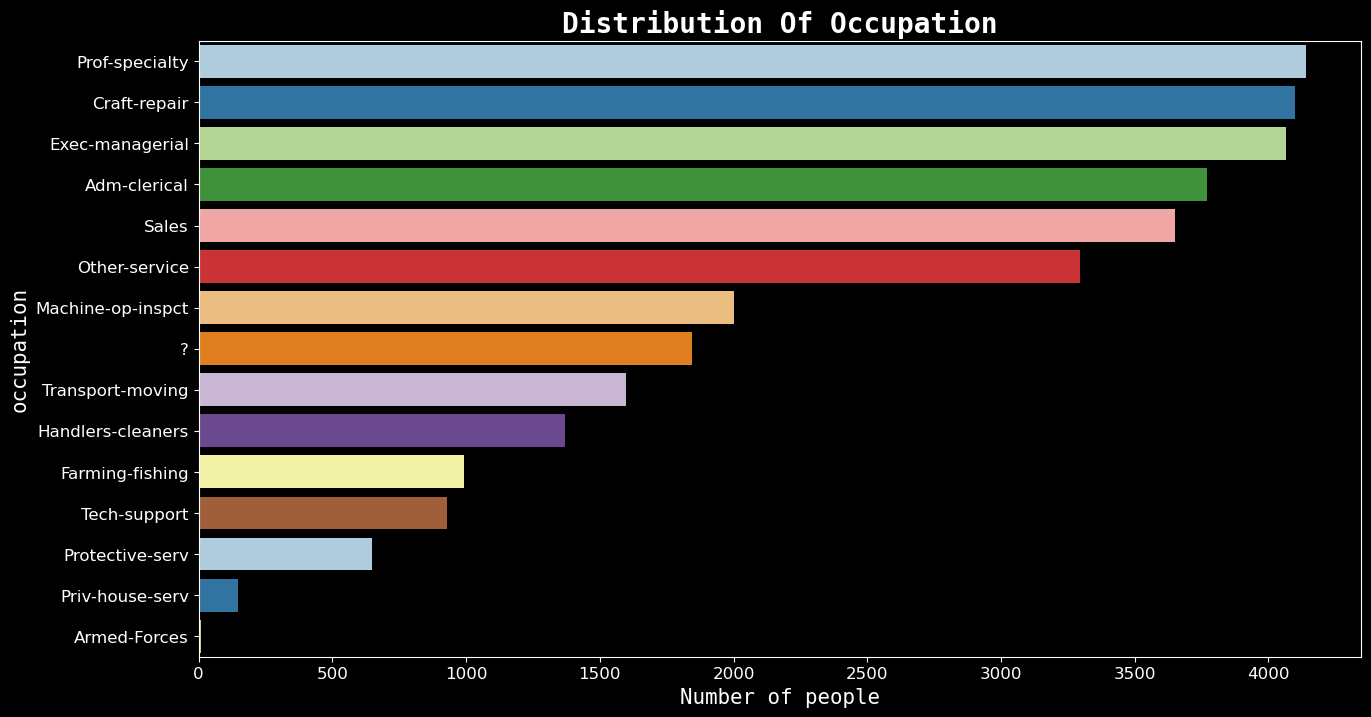

In [29]:

plt.figure(figsize=(15, 8))
sns.barplot(occupation.values, occupation.index, palette='Paired')
plt.title('Distribution Of Occupation', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('occupation', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

# 7.2) Impact Of Occupation On Income.

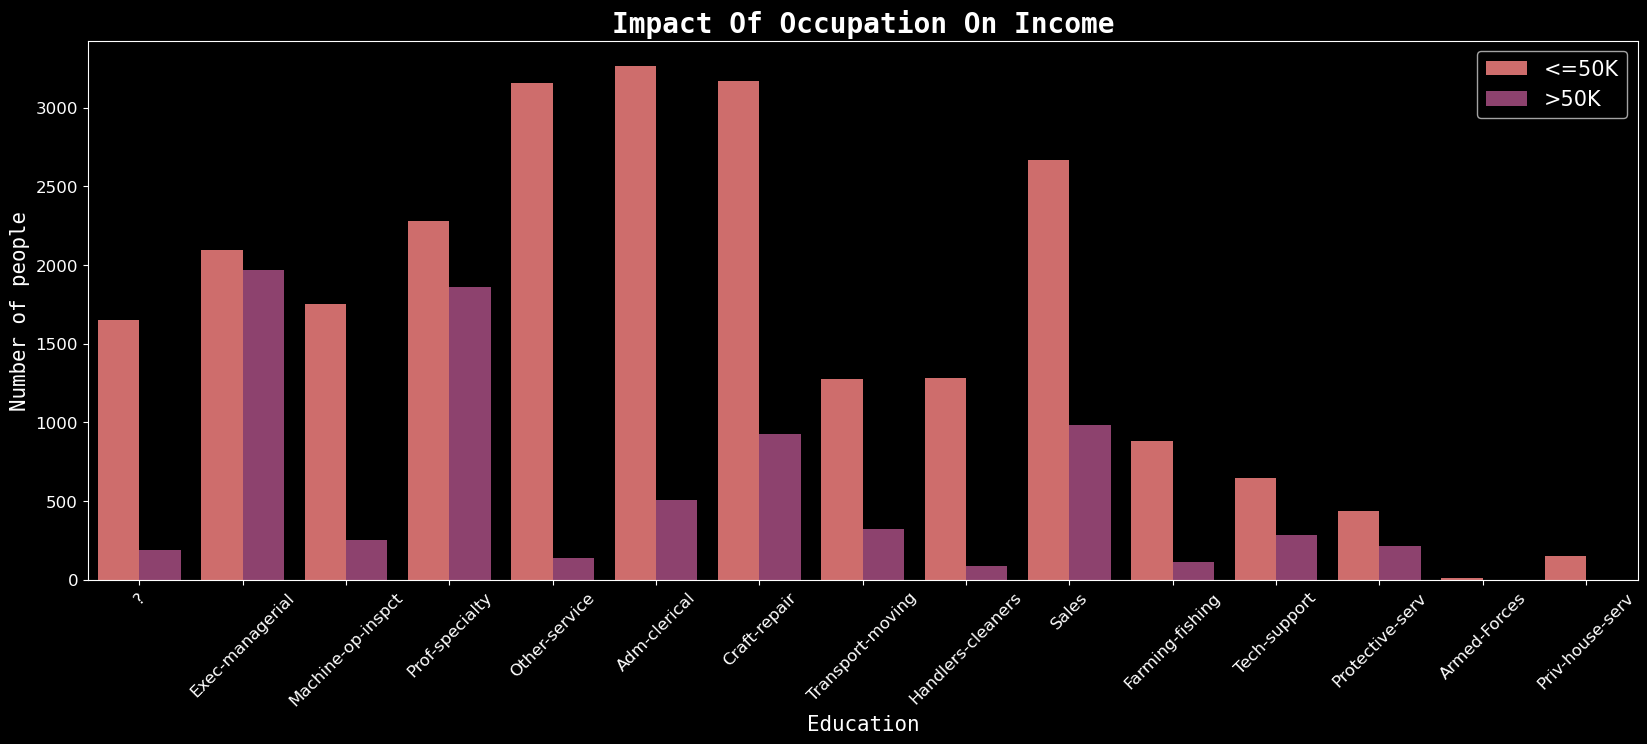

In [30]:
plt.figure(figsize=(20, 7))
sns.countplot(df['occupation'],
              hue=df['income'], palette='flare')
plt.title('Impact Of Occupation On Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.xticks(rotation = 45)
plt.legend(loc=1, prop={'size': 15})
plt.show()

# 8 ) Distribution Of Relationship. 

In [31]:
df.sample()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_range
13166,36,Private,169037,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K,30-40


<AxesSubplot:>

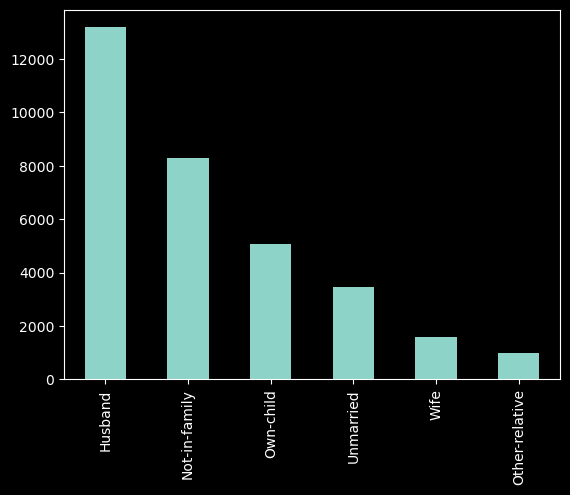

In [32]:
df['relationship'].value_counts().plot(kind='bar')

# 8.1 ) Distribution of Income across relationship.

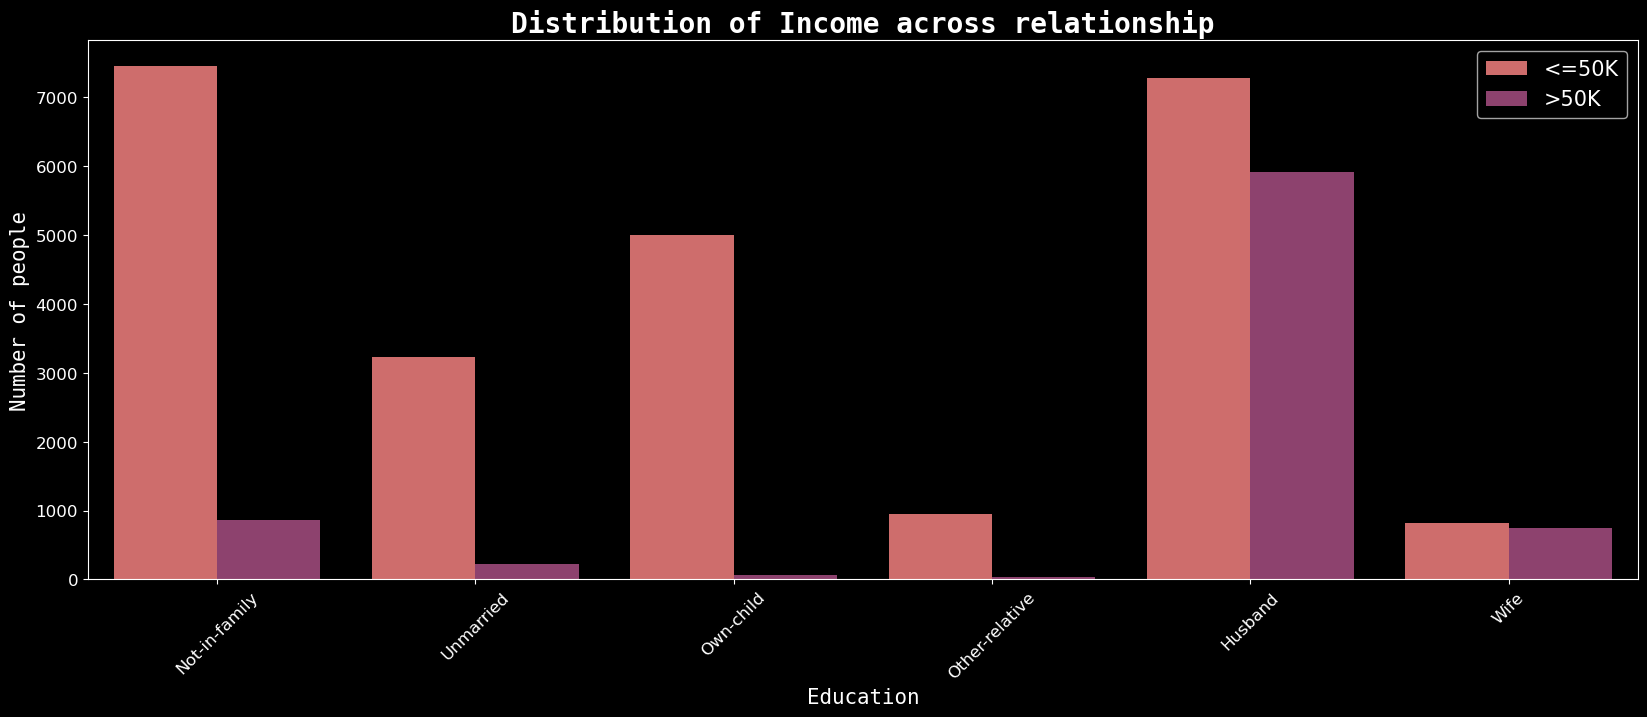

In [33]:
plt.figure(figsize=(20, 7))
sns.countplot(df['relationship'],
              hue=df['income'], palette='flare')
plt.title('Distribution of Income across relationship', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.xticks(rotation = 45)
plt.legend(loc=1, prop={'size': 15})
plt.show()

# 9 ) Distribution of Race In The Data.

<AxesSubplot:xlabel='race', ylabel='Count'>

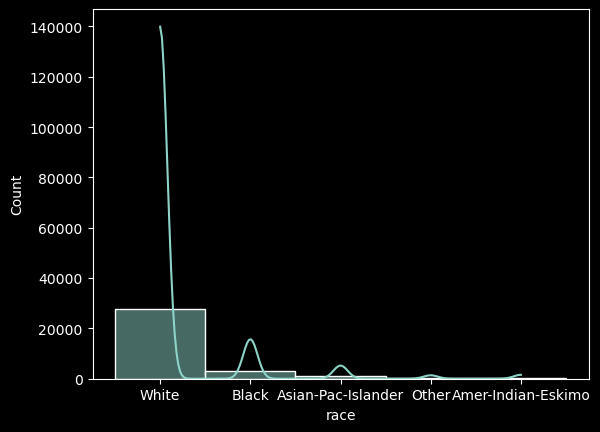

In [34]:
sns.histplot(df['race'],kde=True)

# 9.2 ) Distribution of Income Across Race.

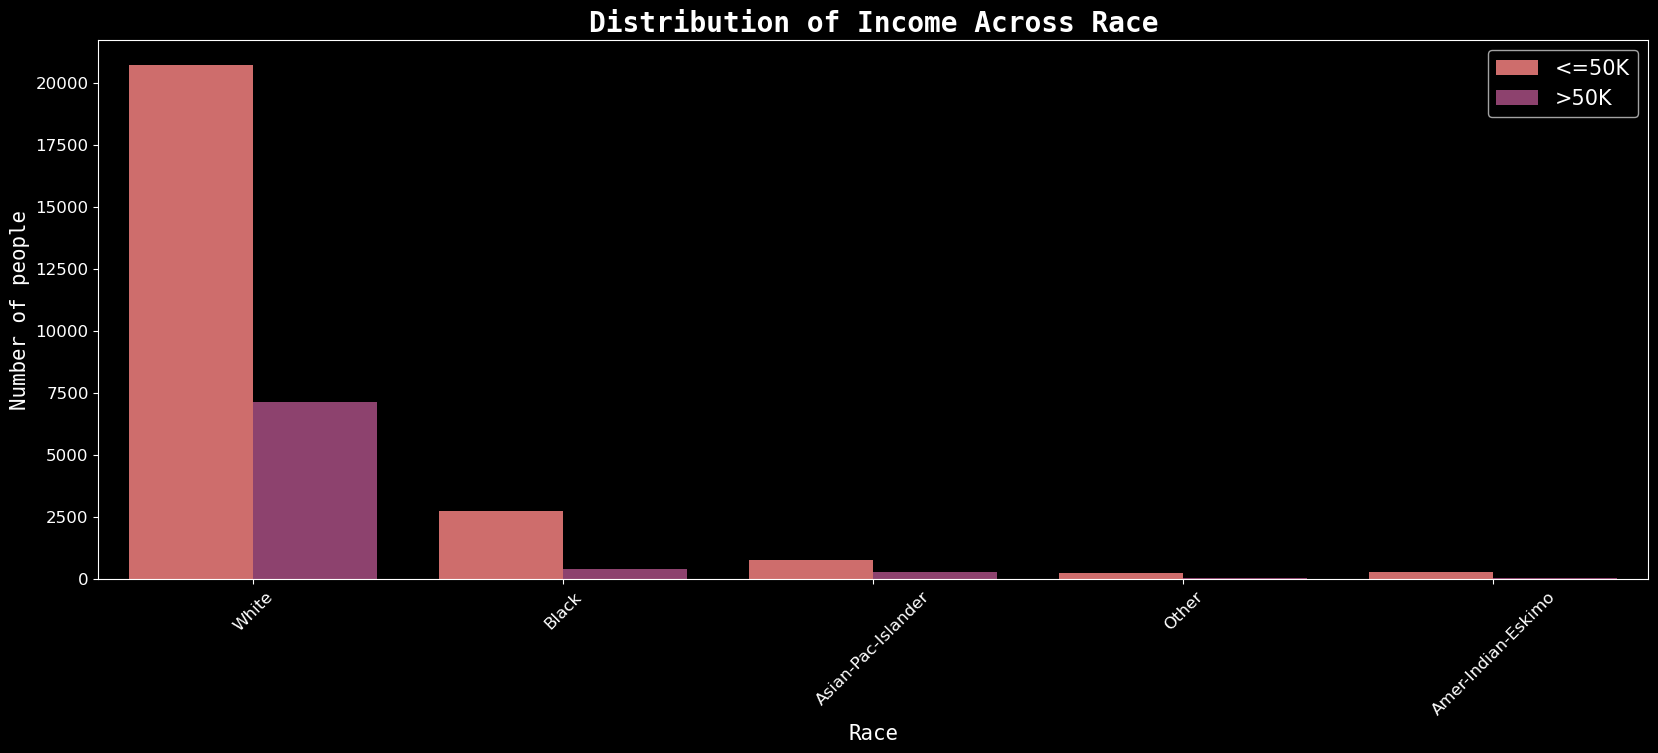

In [35]:
plt.figure(figsize=(20, 7))
sns.countplot(df['race'],
              hue=df['income'], palette='flare')
plt.title('Distribution of Income Across Race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.xticks(rotation = 45)
plt.legend(loc=1, prop={'size': 15})
plt.show()

# 10 ) Distribution of Sex Data.

In [36]:
df.sample()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_range
10769,29,Private,109621,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,20-30


<AxesSubplot:ylabel='sex'>

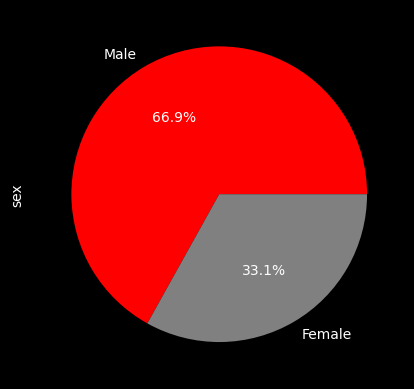

In [37]:
df['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=['r','grey'])

# 10.1)Distribution of income across sex.

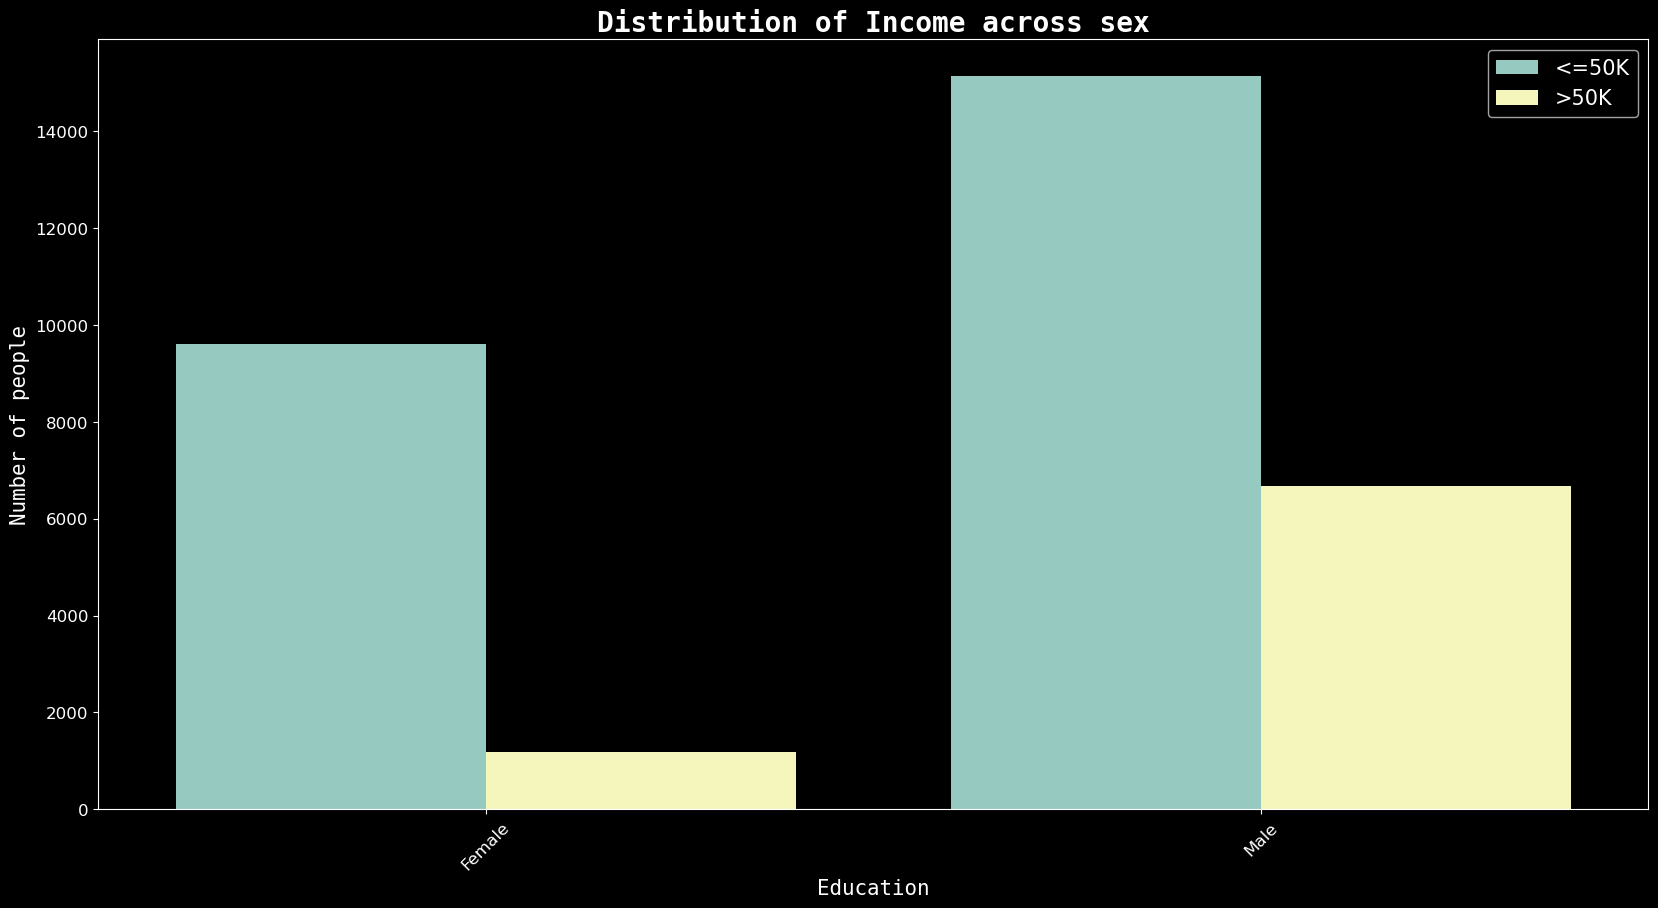

In [38]:
plt.figure(figsize=(20, 10))
sns.countplot(df['sex'],
              hue=df['income'])
plt.title('Distribution of Income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.xticks(rotation = 45)
plt.legend(loc=1, prop={'size': 15})
plt.show()

# 11 ) Distribution of Capital Gain .

In [39]:
df.sample()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_range
6114,34,Private,244147,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,?,>50K,30-40


Text(0.5, 1.0, 'Distribution of capital gain')

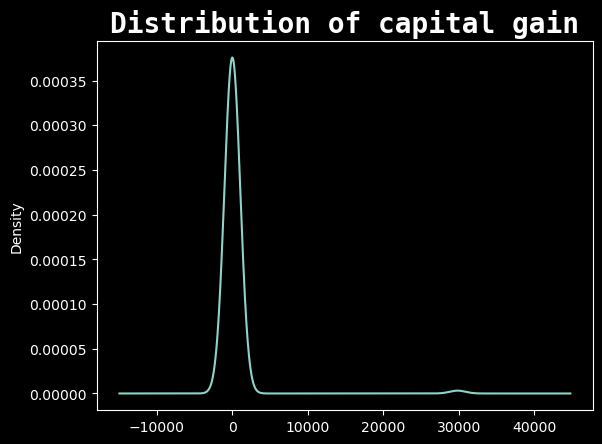

In [40]:
df['capital.gain'].value_counts().plot(kind='kde')
plt.title('Distribution of capital gain', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})

# 12 ) Distribution of Capital Loss .

Text(0.5, 1.0, 'Distribution of capital loss')

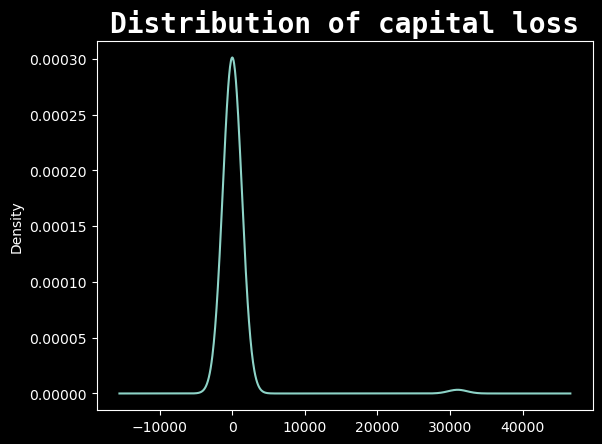

In [41]:
df['capital.loss'].value_counts().plot(kind='kde')
plt.title('Distribution of capital loss', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})

# 13 ) Count Of Hours Per Week. 

In [42]:
df['hours.per.week'].mean()

40.437455852092995

Average work hour per week done by people is 40.43 Hours.

<AxesSubplot:>

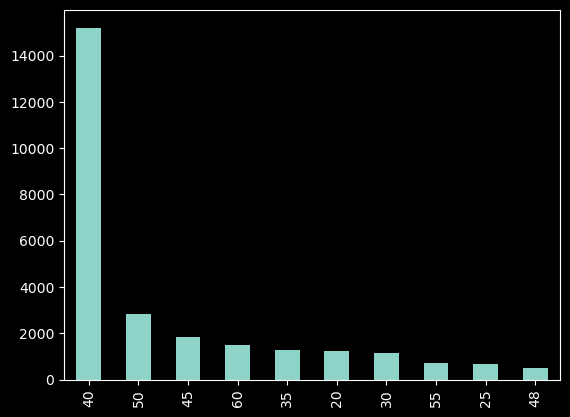

In [43]:
df['hours.per.week'].value_counts()[0:10].plot(kind='bar')

# 13.1) Distribution Of Income Across Hours Per Week.

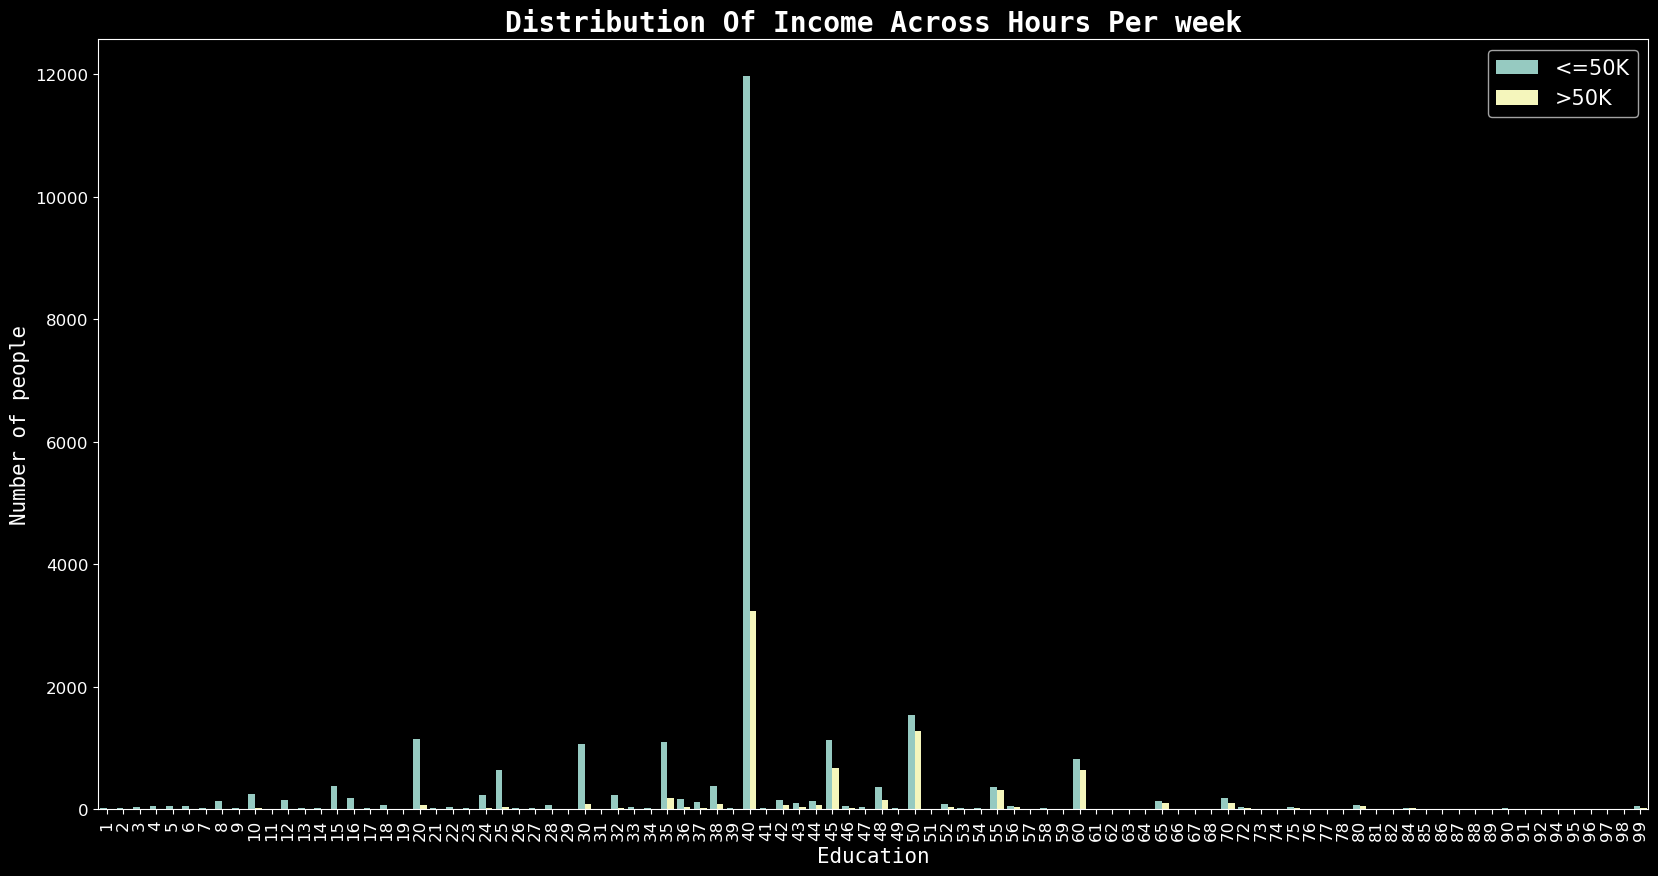

In [44]:
plt.figure(figsize=(20, 10))
sns.countplot(df['hours.per.week'],
              hue=df['income'])
plt.title('Distribution Of Income Across Hours Per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.xticks(rotation = 90)
plt.legend(loc=1, prop={'size': 15})
plt.show()

# 14 ) Distribution Of Native Country Across Data.

<AxesSubplot:>

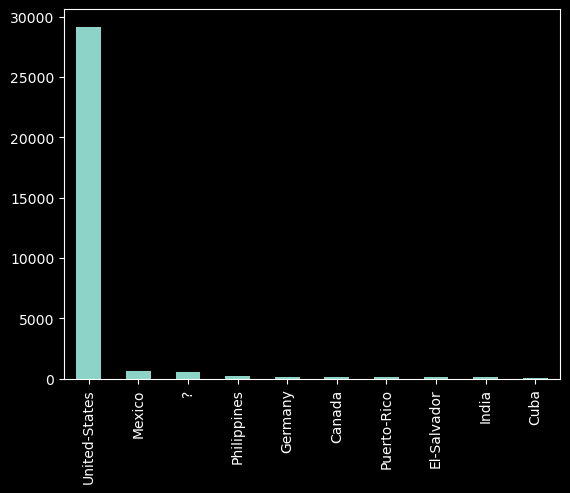

In [45]:
df['native.country'].value_counts()[0:10].plot(kind='bar')

# 14.1 ) Distribution Of Income Across Native Country.

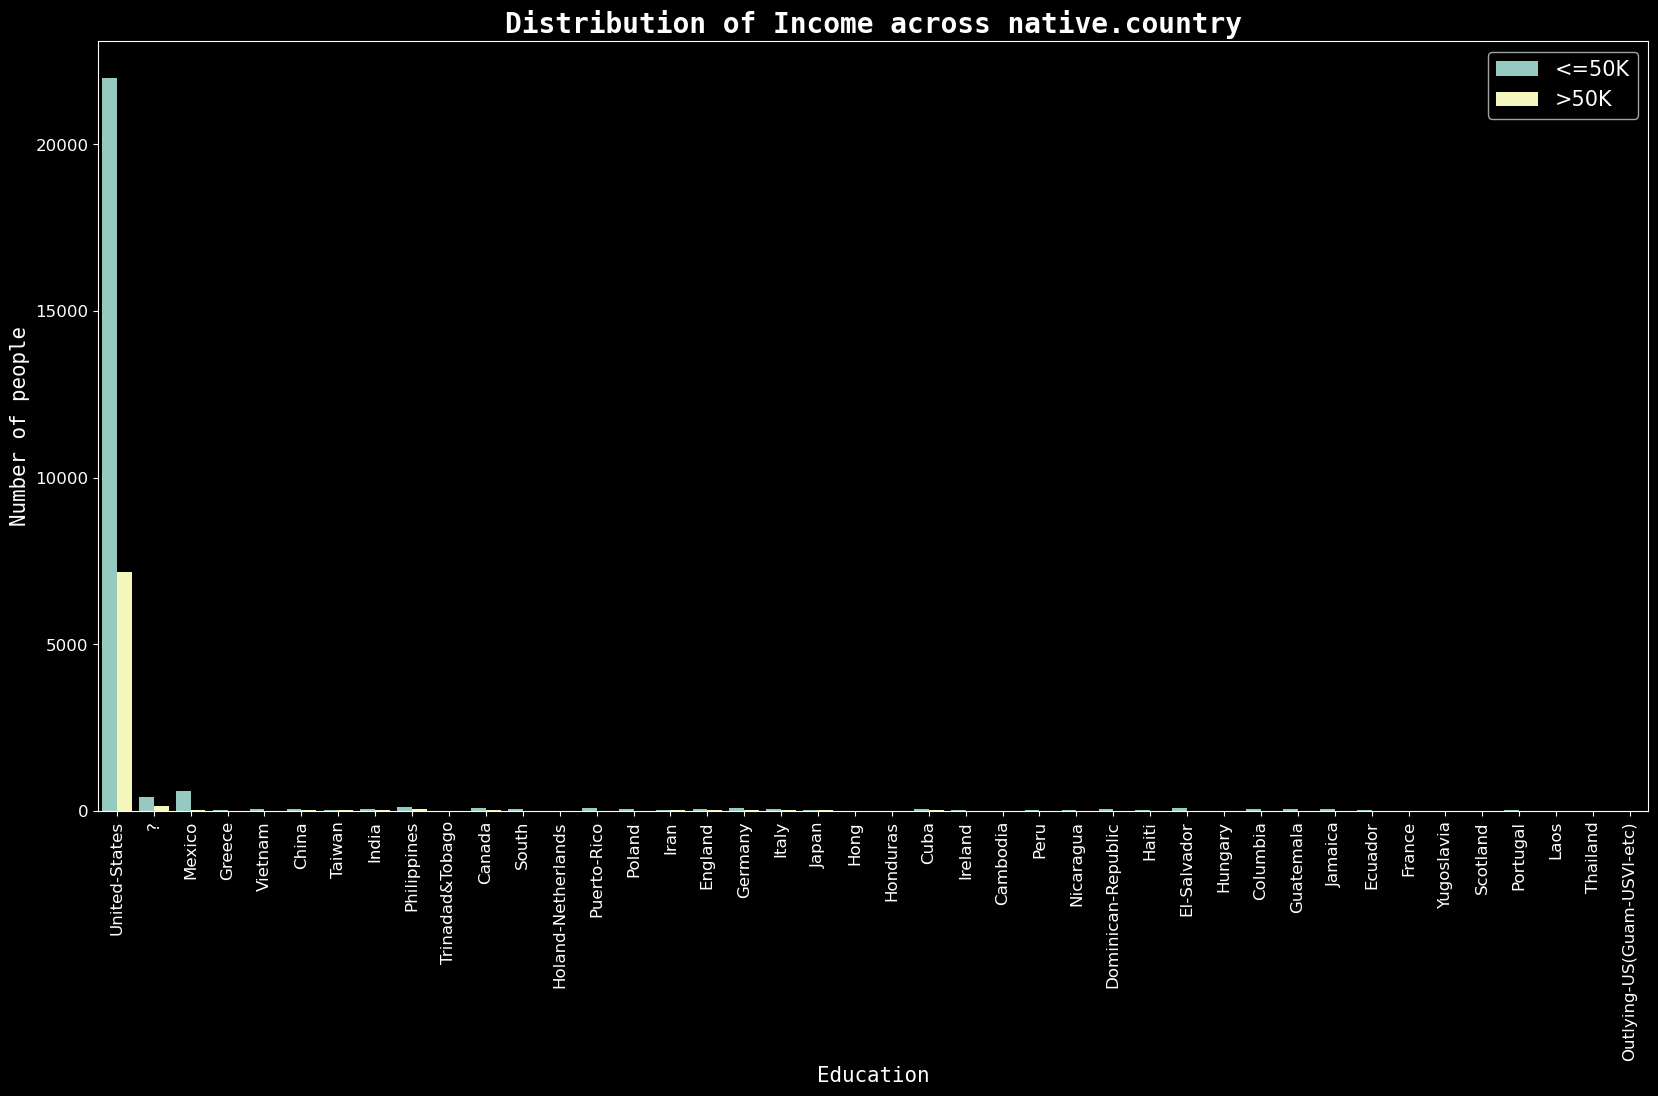

In [46]:
plt.figure(figsize=(20, 10))
sns.countplot(df['native.country'],
              hue=df['income'])
plt.title('Distribution of Income across native.country', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.xticks(rotation = 90)
plt.legend(loc=1, prop={'size': 15})
plt.show()

# * Handling Special Character

In [47]:
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
age_range            0
dtype: int64

In [48]:
df=df.replace('?',np.nan)

In [49]:
columns_with_nan=['workclass','occupation','native.country']

In [50]:
for col in columns_with_nan:
 df[col].fillna(df[col].mode()[0], inplace=True)

In [51]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_range
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K,90+
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,90+
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K,70-80
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,50-60
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,40-50


In [52]:
df.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
age_range         0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  object  
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  object  
 4   education.num   32561 non-null  int64   
 5   marital.status  32561 non-null  object  
 6   occupation      32561 non-null  object  
 7   relationship    32561 non-null  object  
 8   race            32561 non-null  object  
 9   sex             32561 non-null  object  
 10  capital.gain    32561 non-null  int64   
 11  capital.loss    32561 non-null  int64   
 12  hours.per.week  32561 non-null  int64   
 13  native.country  32561 non-null  object  
 14  income          32561 non-null  object  
 15  age_range       32561 non-null  category
dtypes: category(1), int64(6), object(9)
memory usage: 3.8+ MB


# *Multivariate Analysis

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [55]:
df['income'] = le.fit_transform(df['income'])

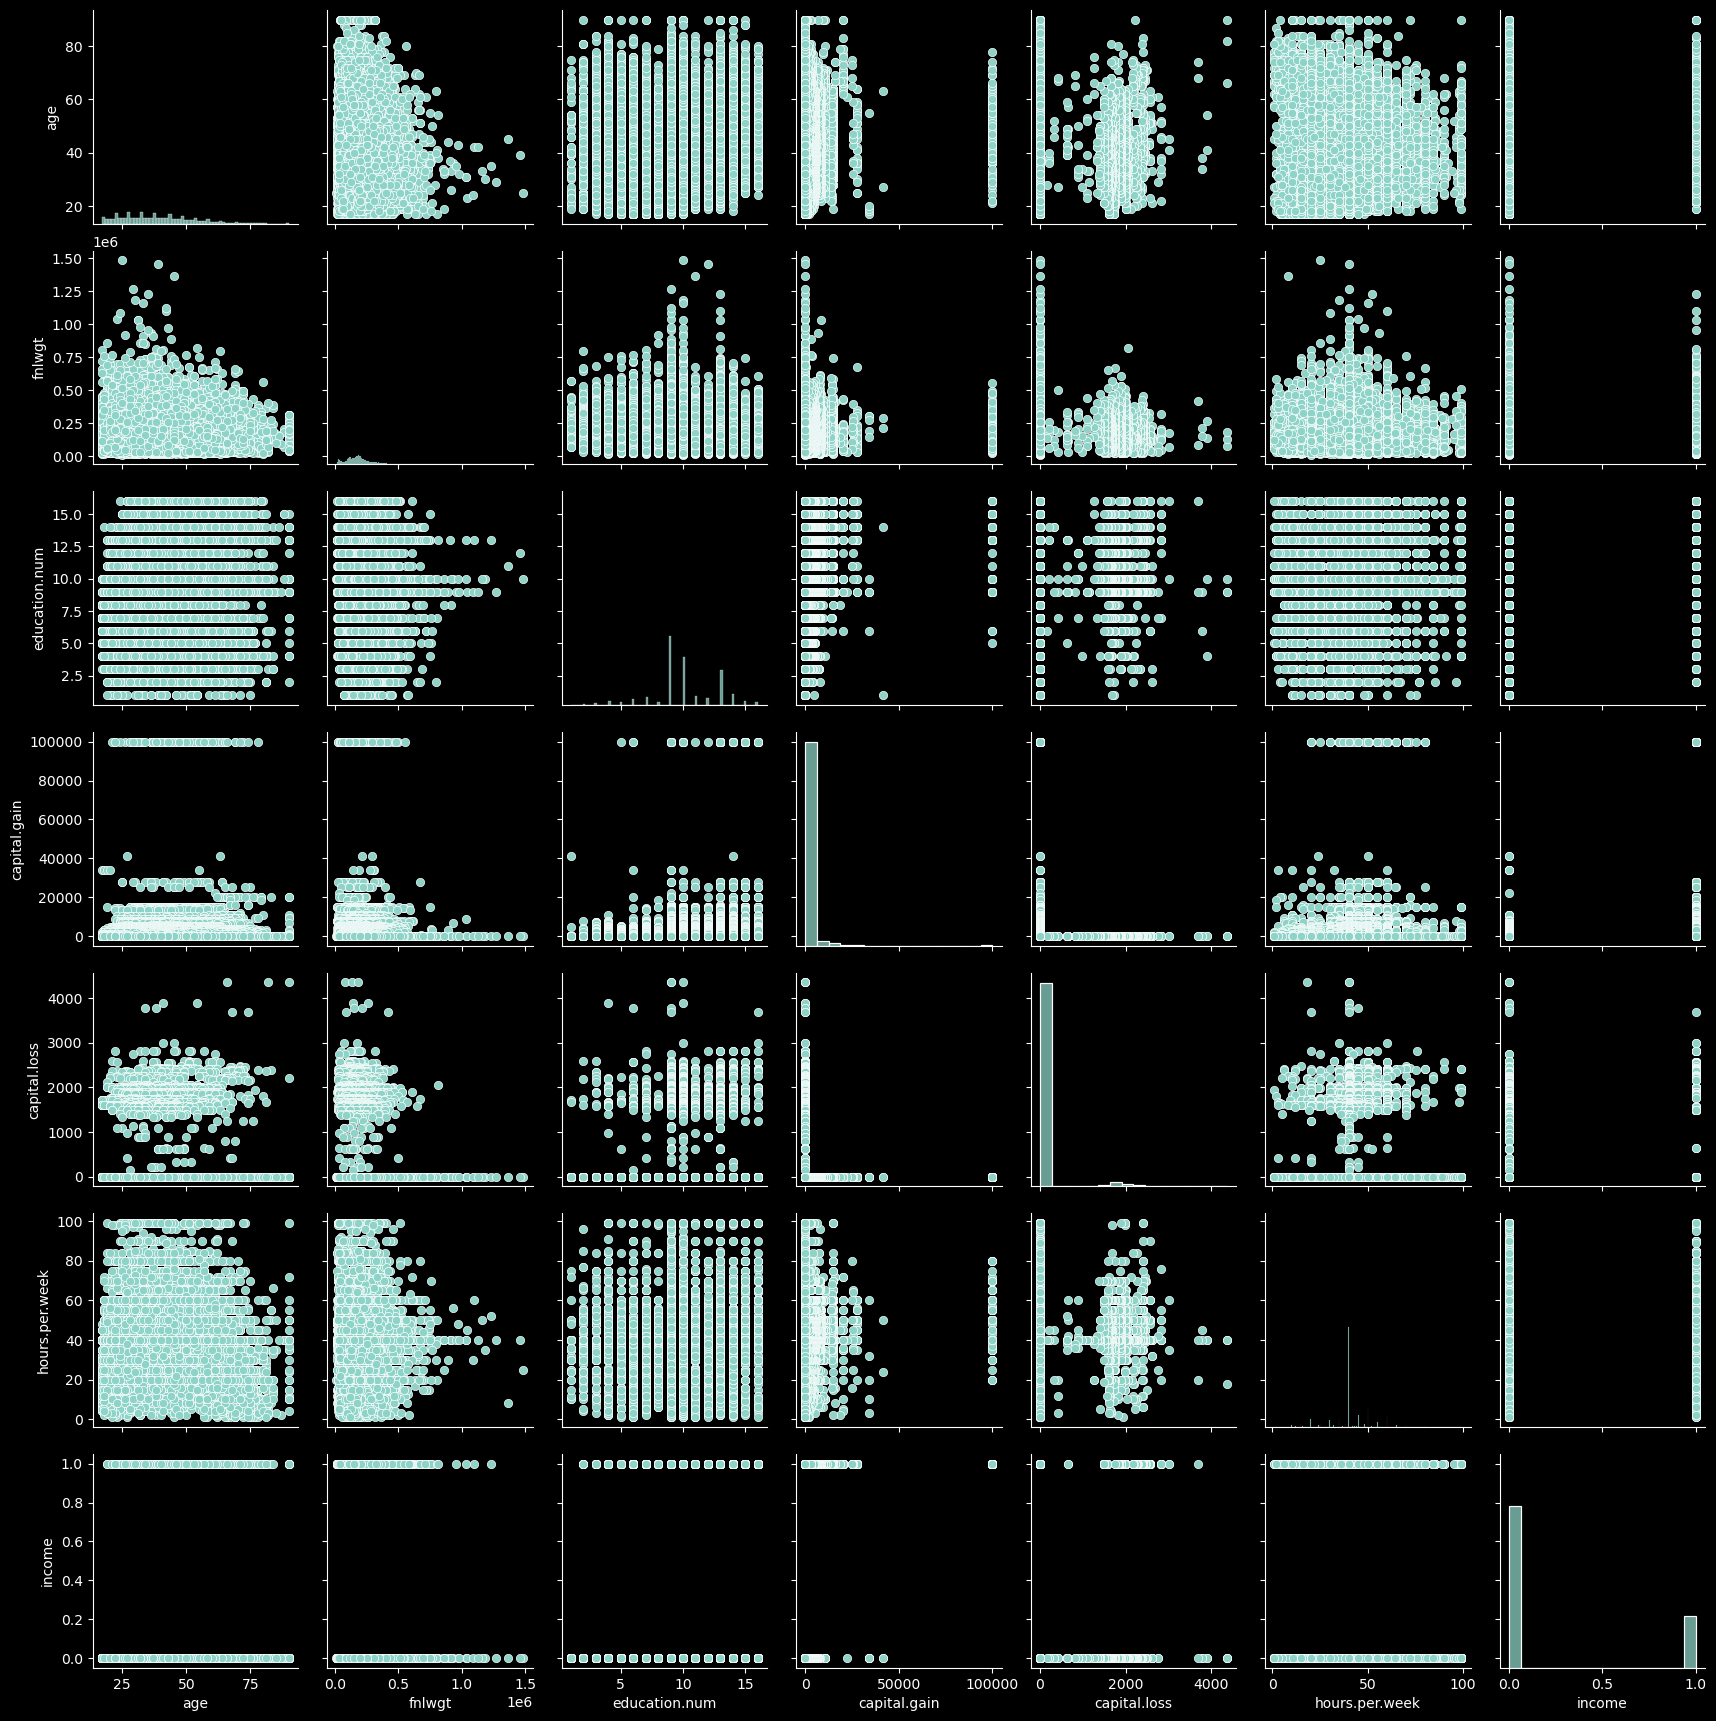

In [56]:
# Creating a pairplot of dataset
sns.pairplot(df)
plt.savefig('multi1.png')
plt.show()

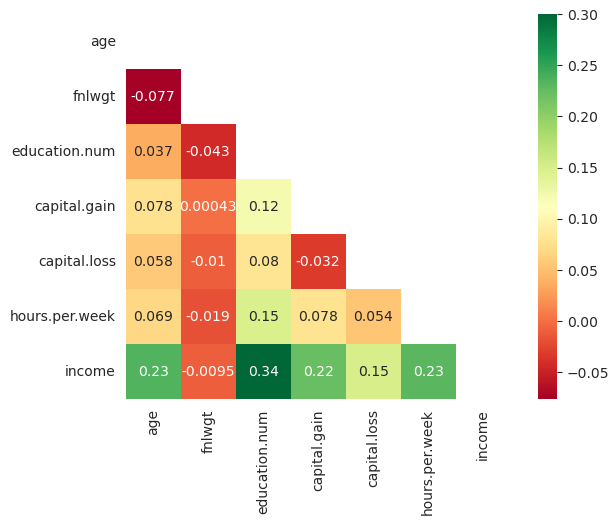

In [57]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

# * Dropping unwanted columns

In [58]:
df.drop(['fnlwgt','age_range'],axis=1,inplace=True)

In [59]:
df.sample()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
13580,35,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,0


<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
        
<li><p style="font-family:verdana;">
In this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.
</p></li>    

<li><p style="font-family:verdana;">
From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.
</p></li>    

</ul>

</div>

# *Data Preprocessing

### 1: Label Encoding

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

### 2: Feature Selection

In [62]:
X = df.drop('income', axis=1)
Y = df['income']

In [63]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [64]:
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [65]:
feature_imp = selector.feature_importances_

In [66]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 22.33
1 4.83
2 3.98
3 9.44
4 8.64
5 8.78
6 9.55
7 1.75
8 3.06
9 10.04
10 3.26
11 12.46
12 1.87


In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   education       32561 non-null  int64
 3   education.num   32561 non-null  int64
 4   marital.status  32561 non-null  int64
 5   occupation      32561 non-null  int64
 6   relationship    32561 non-null  int64
 7   race            32561 non-null  int64
 8   sex             32561 non-null  int64
 9   capital.gain    32561 non-null  int64
 10  capital.loss    32561 non-null  int64
 11  hours.per.week  32561 non-null  int64
 12  native.country  32561 non-null  int64
dtypes: int64(13)
memory usage: 3.2 MB


In [68]:
X = X.drop(['workclass', 'education', 'race', 'sex',
            'capital.loss', 'native.country'], axis=1)

### 3: Feature Scaling

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

### 4: Fixing imbalanced dataset using Oversampling

In [71]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: income, dtype: object

In [72]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [73]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [74]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [75]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: income, dtype: object

### 5: Creating a train test split

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [77]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39552, 7)
X_test shape: (9888, 7)
Y_train shape: (39552,)
Y_test shape: (9888,)


# * Data Modelling

### 1: Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [79]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [80]:
Y_pred_log_reg = log_reg.predict(X_test)

### 2: KNN Classifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [82]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [83]:
Y_pred_knn = knn.predict(X_test)

### 3: Support Vector Classifier

In [84]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [85]:
svc.fit(X_train, Y_train)

SVC(random_state=42)

In [86]:
Y_pred_svc = svc.predict(X_test)

### 4: Naive Bayes Classifier

In [87]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [88]:
nb.fit(X_train, Y_train)

GaussianNB()

In [89]:
Y_pred_nb = nb.predict(X_test)

### 5: Decision Tree Classifier

In [90]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)

In [91]:
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [92]:
Y_pred_dec_tree = dec_tree.predict(X_test)

### 6: Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)

In [94]:
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [95]:
Y_pred_ran_for = ran_for.predict(X_test)

### 7: XGB Classifier

In [96]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [97]:
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [98]:
Y_pred_xgb = xgb.predict(X_test)

# * Model Evaluation

In [99]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [100]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 75.34
F1 score: 75.2


In [101]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 83.34
F1 score: 84.28


In [102]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 81.65
F1 score: 82.64


In [103]:
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_nb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_nb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 64.63
F1 score: 48.31


In [104]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 88.23
F1 score: 88.76


In [105]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 89.47
F1 score: 89.96


In [106]:
print('XGB Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_xgb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_xgb) * 100, 2))

XGB Classifier:
Accuracy score: 85.0
F1 score: 85.55


# * Hyperparameter Tuning

In [107]:
from sklearn.model_selection import RandomizedSearchCV

In [108]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [109]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [110]:
rf_tuned = RandomForestClassifier(random_state=42)

In [111]:
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [112]:
rf_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [113]:
rf_cv.best_score_

0.8897654548444365

In [114]:
rf_cv.best_params_

{'n_estimators': 126, 'max_depth': 79}

## Result Using Best Parameters 

In [115]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [116]:
rf_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [117]:
Y_pred_rf_best = rf_best.predict(X_test)

In [118]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 89.45
F1 score: 89.95


In [119]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf_best)

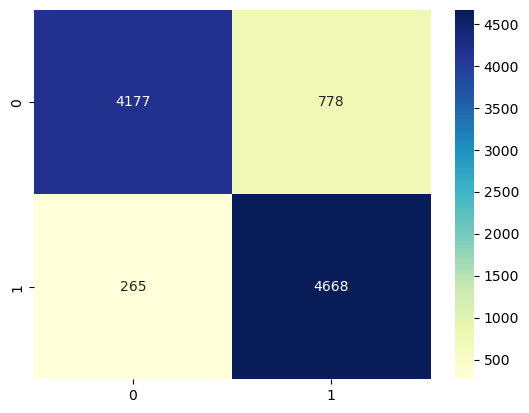

In [120]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [121]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      4955
           1       0.86      0.95      0.90      4933

    accuracy                           0.89      9888
   macro avg       0.90      0.89      0.89      9888
weighted avg       0.90      0.89      0.89      9888

